# Catalina Surveys Periodic Variable Catalog
* Described in http://nesssi.cacr.caltech.edu/DataRelease/Varcat.html 
* Need to download http://nesssi.cacr.caltech.edu/DataRelease/CatalinaVars.tbl, and http://nesssi.cacr.caltech.edu/DataRelease/AllVar.phot.gz

In [18]:
import pandas
import numpy
import matplotlib.pyplot as plt
from collections import Counter

# Photometry data

In [19]:
phot_df = pandas.read_csv('data/AllVar.phot',header = None,names=['ID','MJD','Mag','Magerr','RA','Dec'])
phot_df = phot_df.set_index('ID')
print(phot_df.shape)
phot_df.head()

(13712786, 5)


,MJD,Mag,Magerr,RA,Dec
ID,,,,,
1109065026725,53466.263201,16.811625,0.077096,182.25874,9.76575
1109065026725,53466.270722,16.864269,0.078026,182.25869,9.76582
1109065026725,53466.278261,16.873783,0.078234,182.25870,9.76582
1109065026725,53466.285811,16.875163,0.078293,182.25875,9.76584
1109065026725,53705.481591,16.921303,0.082772,182.25869,9.76589


In [20]:
IDs = numpy.unique(phot_df.index)
nof_objecs = len(IDs)
print(nof_objecs, 'objects')

46821 objects


# Catalog with labels

| Type	| Percent	| Number | ID |
| --- | --- | --- | --- | 
|EW 	     |49.93 |30743 	|1
|EA 	     |7.61 	|4683 	|2
|beta Lyrae  |0.45 	|279 	|3
|RRab 	     |27.28 |16797 	|4
|RRc 	     |8.88 	|5469 	|5
|RRd 	     |0.82 	|502 	|6
|Blazkho     |0.36 	|223 	|7
|RS CVn 	 |2.47 	|1522 	|8
|ACEP 	     |0.10 	|64 	|9
|Cep-II 	 |0.20 	|124 	|10
|HADS 	     |0.39 	|242 	|11
|LADS 	     |0.01 	|7 	    |12
|LPV 	     |0.83 	|512 	|13
|ELL 	     |0.23 	|143 	|14
|Hump 	     |0.04 	|25 	|15
|PCEB    	 |0.14 	|85 	|16
|EA_UP       |0.25 	|155 	|17

In [21]:
catalog_df = pandas.read_csv('data/CatalinaVars.tbl',header = None,sep = '\s+', skiprows=1,
                             names=['Catalina_Surveys_ID','Numerical_ID','RA_(J2000)','Dec','V_(mag)','Period_(days)','Amplitude', 'Number_Obs','Var_Type'])
catalog_df = catalog_df.set_index('Numerical_ID')
print(catalog_df.shape)
catalog_df.head()

(47055, 8)


,Catalina_Surveys_ID,RA_(J2000),Dec,V_(mag),Period_(days),Amplitude,Number_Obs,Var_Type
Numerical_ID,,,,,,,,
1109001041232,CSS_J000020.4+103118,00:00:20.41,+10:31:18.9,14.62,1.491758,2.39,223,2
1009001044997,CSS_J000031.5-084652,00:00:31.50,-08:46:52.3,14.14,0.404185,0.12,163,1
1140001063366,CSS_J000036.9+412805,00:00:36.94,+41:28:05.7,17.39,0.274627,0.73,158,1
1138001069849,CSS_J000037.5+390308,00:00:37.55,+39:03:08.1,17.74,0.30691,0.23,219,1
1109001050739,CSS_J000103.3+105724,00:01:03.37,+10:57:24.4,15.25,1.5837582,0.11,223,8


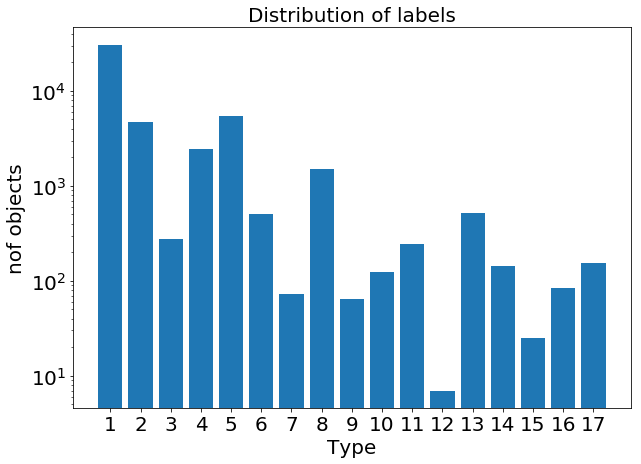

In [22]:
var_types = catalog_df['Var_Type'].values
counts = Counter(var_types)
plt.figure(figsize = (10,7))
#plt.hist(var_types,log=True, bins)
plt.bar(counts.keys(),counts.values(),log=True)
plt.title('Distribution of labels', fontsize = 20)
plt.xlabel('Type',fontsize = 20)
plt.ylabel('nof objects',fontsize = 20)
plt.xticks(list(counts.keys()), fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## The photometry data and the catalog do not contain excatly the same objects, so keep only the ones that are in both:

In [23]:
#m = catalog_df.merge(phot_df, how = 'inner', left_index=True, right_index=True)
#print(m.shape)
#m.head()

In [24]:
#m_IDs = numpy.unique(m.index)
#m_nof_objecs = len(m_IDs)
#print(m_nof_objecs, 'objects')

In [25]:
# Looks like all the objects with photometry have labels

In [38]:
labels = catalog_df['Var_Type'].loc[IDs]
labels.values
numpy.save('labels',labels)

# Example light curve

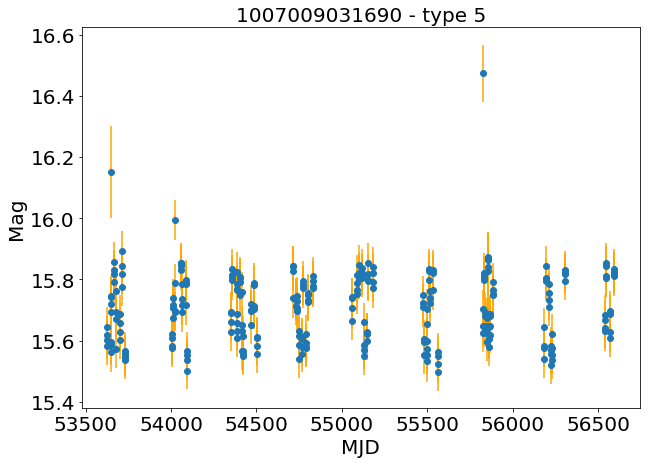

In [26]:
idx = numpy.random.choice(IDs)
var_type = catalog_df['Var_Type'].loc[idx]
y = phot_df['Mag'].loc[idx]
y_err = phot_df['Magerr'].loc[idx]
x = phot_df['MJD'].loc[idx]
plt.figure(figsize = (10,7))
plt.errorbar(x=x,y=y, yerr=y_err,fmt='o', ecolor='orange' )
ttl = '{} - type {}'.format(idx, var_type)
plt.title(ttl, fontsize = 20)
plt.xlabel('MJD',fontsize = 20)
plt.ylabel('Mag',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Feature extraction
* neet to 'pip install FATS'. The docs are at http://isadoranun.github.io/tsfeat/FeaturesDocumentation.html

In [90]:
# Create a list of light-curves

def det_locs(phot_index, nof_objecs):
    s = numpy.zeros(nof_objecs, dtype=int)
    e = numpy.zeros(nof_objecs, dtype=int)
    IDs = []
    
    curr = phot_index[0]
    IDs += [curr]
    s[0] = 0
    count = 0
    
    for i, idx in enumerate(phot_index):
        if curr != idx:
            curr = idx
            IDs += [curr]
            e[count] = i
            if count < nof_objecs:
                count = count + 1
                s[count] = i
    e[-1] = len(phot_index)
    return s,e,numpy.array(IDs)

phot_index = numpy.array(phot_df.index)
s,e,IDs_ = det_locs(phot_index, nof_objecs)
se = numpy.vstack([s,e]).T

lc_list = []
phot_arr = phot_df[['Mag','MJD','Magerr']].values

for se_ in se:
    lc_list += [phot_arr[se_[0]:se_[1],:]]
print(len(lc_list))

numpy.save('lc_list', lc_list)

46821


In [81]:
import FATS
flist = ['Amplitude',
         'Beyond1Std',
         'FluxPercentileRatioMid20',
         'FluxPercentileRatioMid35',
         'FluxPercentileRatioMid50',
         'FluxPercentileRatioMid65',
         'FluxPercentileRatioMid80',
         'LinearTrend',
         'MaxSlope',
         'MedianAbsDev',
         'MedianBRP',
         'PairSlopeTrend',
         'PercentDifferenceFluxPercentile',
         'Skew',
         'SmallKurtosis',
         'Std',
         'StetsonK',]

def get_features(lc):
    
    lc = lc.T    
    preproccesed_data = FATS.Preprocess_LC(data=lc[0], mjd=lc[1], error=lc[2])
    [mag, time, error] = preproccesed_data.Preprocess()
    lc = numpy.array([mag, time, error])
    
    FATS_fit = FATS.FeatureSpace(Data=['magnitude','time','error'], featureList = flist)
    FATS_fit = FATS_fit.calculateFeature(lc)
    
    return FATS_fit.result()

features_list = []

from joblib import Parallel, delayed
features_list = Parallel(n_jobs=-1, verbose = 10)(delayed(get_features)(lc) for lc in lc_list)
#for lc in tqdm(lc_list):
#    features = get_features(lc)
#    features_list += [features]

features_arr = numpy.vstack(features_list)

/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude

/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: invalid value encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: invalid value encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/storage/home/itamarreis/.conda/envs/peanuts/lib/python3.6/site-packages/FATS-1.3.6-py3.6.egg/FATS/FeatureFunctionLib.py:466: RuntimeWarning: invalid value encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/storage/home/itamarreis/.

In [82]:
print(features_arr.shape)
numpy.save('features', features_arr)

(46821, 17)


In [91]:
labels = catalog_df['Var_Type'].loc[IDs_]
labels.values
numpy.save('labels',labels)

In [92]:
X = []
y = []
IDs_clean = []

for i in range(nof_objecs):
    if ( (~numpy.isfinite(features_arr[i])).sum() == 0 ):
        X += [features_arr[i]]
        y += [labels.values[i]]
        IDs_clean += [IDs[i]]

X = numpy.vstack(X)
y = numpy.array(y)

numpy.save('X',X)
numpy.save('y',y)
numpy.save('IDs_clean',IDs_clean)

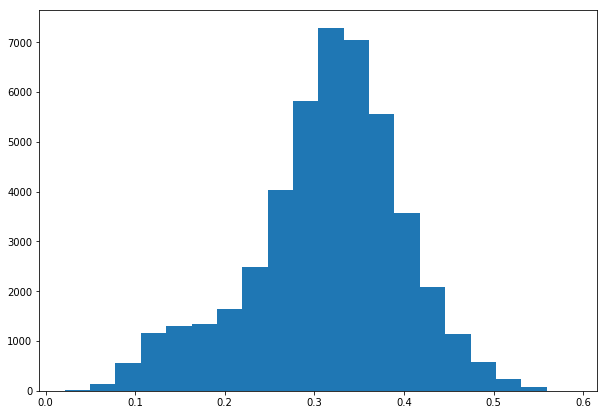

In [86]:
plt.figure(figsize = (10,7))
plt.hist(X[:,1], bins = 20)
plt.show()